In [129]:
import copy
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import skimage.io as io
import scipy.ndimage as ndi

In [167]:
background = io.imread("0034_thresh.jpg")
ct_1 = io.imread("OL_ctFIRE_0034_1.tif")
ct_2 = io.imread("OL_ctFIRE_0034_2.tif")
ct_3 = io.imread("OL_ctFIRE_0034_3.tif")

ct_img = ct_3

print np.shape(background)
print np.shape(ct_img)

(1600, 1600, 3)
(1600, 1600, 3)


In [168]:
ct_img = ct_img[:,75:1525,:]
print np.shape(ct_img)

(1600, 1450, 3)


In [169]:
im = Image.fromarray(ct_img)
im_resized = im.resize((1600, 1600), Image.ANTIALIAS)

([], <a list of 0 Text yticklabel objects>)

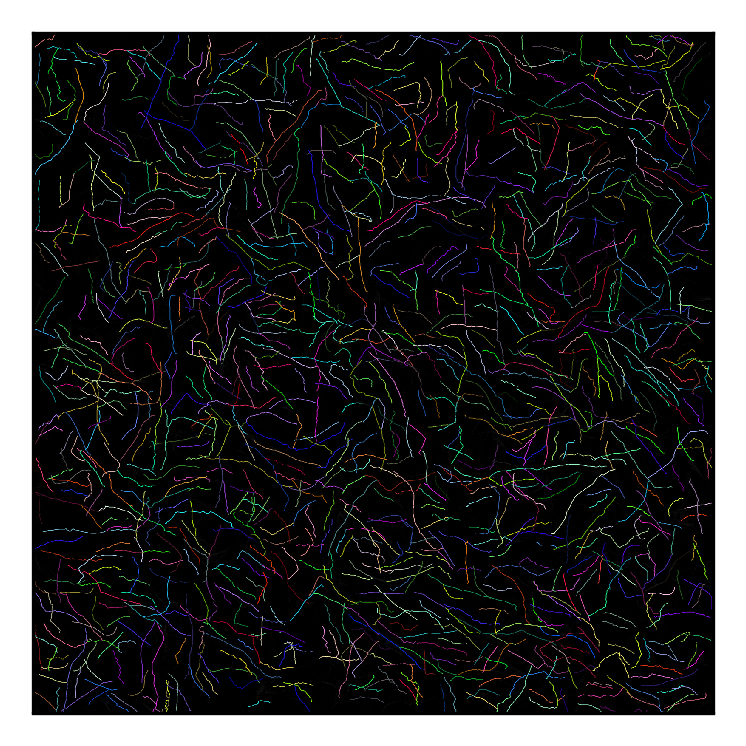

In [170]:
plt.figure(figsize=(3,3), dpi=300)
plt.imshow(im_resized)
plt.xticks([])
plt.yticks([])

In [171]:
cropped_img = np.array(im_resized)
print np.shape(cropped_img)

(1600, 1600, 3)


In [172]:
bin_img = cropped_img[:,:,0] > 10
bin_img = bin_img | (cropped_img[:,:,1] > 10)
bin_img = bin_img | (cropped_img[:,:,2] > 10)

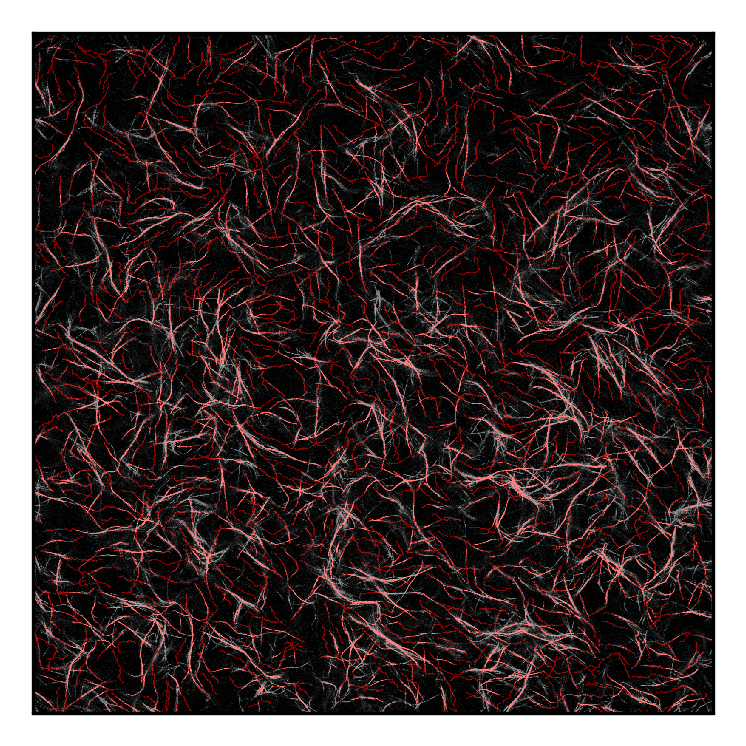

In [173]:
overlay_img = np.zeros((1600,1600,3))
overlay_img[bin_img, 0] = 255

ov = Image.fromarray(overlay_img.astype('uint8'), 'RGB')
bg = Image.fromarray(background)
blended = Image.blend(bg, ov, 0.5)

plt.figure(figsize=(3,3), dpi=300)
plt.imshow(blended)
plt.xticks([])
plt.yticks([])
plt.savefig("OL_ctFIRE_0034_3_cropped.tif")